# PROJECT TEAM ID : PTID-AI-DEC-24-1063

# BATCH ID : 15-JUL-24-AIE-BUN-071-WDM11-BAN

# PROJECT ID : PRAICP-1002-TrafSignDetc	Traffic Sign Detection


In [1]:
# Importing Libraries
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import numpy as np
import pandas as pd
import cv2
import os

In [2]:
# Reading the input images and putting them into a numpy array
data = []
labels = []

height = 30
width = 30
channels = 3
classes = 42
n_inputs = height * width * channels

In [3]:
classes = {
    0: "Speed limit (20km/h)",
    1: "Speed limit (30km/h)",
    2: "Speed limit (50km/h)",
    3: "Speed limit (60km/h)",
    4: "Speed limit (70km/h)",
    5: "Speed limit (80km/h)",
    6: "End of Speed limit (80km/h)",
    7: "Speed limit (100km/h)",
    8: "Speed limit (120km/h)",
    9: "No passing",
    10: "No passing veh over 3.5 tons",
    11: "Right-of-way at intersection",
    12: "Priority road",
    13: "Yield",
    14: "Stop",
    15: "No vehicles",
    16: "Veh > 3.5 tons prohibited",
    17: "No entry",
    18: "General caution",
    19: "Dangerous curve left",
    20: "Dangerous curve right",
    21: "Double curve",
    22: "Bumpy road",
    23: "Slippery road",
    24: "Road narrows on the right",
    25: "Road work",
    26: "Traffic signals",
    27: "Pedestrians",
    28: "Children crossing",
    29: "Bicycle crossing",
    30: "Beware of ice/snow",
    31: "Wild animals crossing",
    32: "End speed + passing limits",
    33: "Turn right ahead",
    34: "Turn left ahead",
    35: "Ahead only",
    36: "Go straight or right",
    37: "Go straight or left",
    38: "Keep right",
    39: "Keep Left",
    40: "Roundabout mandatory",
    41: "End of no passing",
    42: "End of no passing veh > 3.5 tons",
}

In [4]:
train_csv = pd.read_csv(
    r"E:\AIE_Expert_Internship\traffic_sign_detection\Data\Train.csv"
)
test_csv = pd.read_csv(r"E:\AIE_Expert_Internship\traffic_sign_detection\Data\Test.csv")

In [5]:
train_csv.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train\20\00020_00000_00000.png
1,28,27,5,6,23,22,20,Train\20\00020_00000_00001.png
2,29,26,6,5,24,21,20,Train\20\00020_00000_00002.png
3,28,27,5,6,23,22,20,Train\20\00020_00000_00003.png
4,28,26,5,5,23,21,20,Train\20\00020_00000_00004.png


In [6]:
test_csv["Path"]

0        Test\00000.png
1        Test\00001.png
2        Test\00002.png
3        Test\00003.png
4        Test\00004.png
              ...      
12625    Test\12625.png
12626    Test\12626.png
12627    Test\12627.png
12628    Test\12628.png
12629    Test\12629.png
Name: Path, Length: 12630, dtype: object

In [7]:
import glob
import os

# Specify the directory containing the images
directory_path = r"E:\AIE_Expert_Internship\traffic_sign_detection\Data"

# Use glob to list all files in the directory
img_paths = [a for a in glob.glob(os.path.join(directory_path, "*"))]

# Print the paths
print(img_paths)

['E:\\AIE_Expert_Internship\\traffic_sign_detection\\Data\\Meta', 'E:\\AIE_Expert_Internship\\traffic_sign_detection\\Data\\Meta.csv', 'E:\\AIE_Expert_Internship\\traffic_sign_detection\\Data\\Test', 'E:\\AIE_Expert_Internship\\traffic_sign_detection\\Data\\Test.csv', 'E:\\AIE_Expert_Internship\\traffic_sign_detection\\Data\\Train', 'E:\\AIE_Expert_Internship\\traffic_sign_detection\\Data\\Train.csv']


In [8]:
training_images_path = list(
    "E:\\AIE_Expert_Internship\\traffic_sign_detection\\Data\\" + train_csv["Path"]
)
testing_images_path = list(
    "E:\\AIE_Expert_Internship\\traffic_sign_detection\\Data\\" + test_csv["Path"]
)

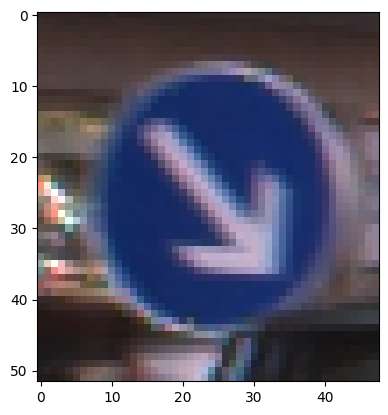

In [9]:
image = plt.imread(testing_images_path[2])

plt.imshow(image)

In [10]:
train_csv["ClassId"].unique()  # all unique classes available in the data

array([20,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=int64)

In [11]:
train_csv["Path"]

0        Train\20\00020_00000_00000.png
1        Train\20\00020_00000_00001.png
2        Train\20\00020_00000_00002.png
3        Train\20\00020_00000_00003.png
4        Train\20\00020_00000_00004.png
                      ...              
39204    Train\42\00042_00007_00025.png
39205    Train\42\00042_00007_00026.png
39206    Train\42\00042_00007_00027.png
39207    Train\42\00042_00007_00028.png
39208    Train\42\00042_00007_00029.png
Name: Path, Length: 39209, dtype: object

In [12]:
# from sklearn.utils import shuffle

training_labels = list(train_csv["ClassId"])
testing_labels = list(test_csv["ClassId"])

training_labels = training_labels
testing_labels = testing_labels

print(len(training_labels))
# training_images_path,training_labels = shuffle(training_images_path,training_labels)

# training_images_path = training_images_path
# training_labels = training_labels

unique_classes = pd.unique(training_labels)
print("Total Classes = ", format(len(unique_classes)))
print("Total Training Examples = ", format(len(training_images_path)))

39209
Total Classes =  43
Total Training Examples =  39209


C:\Users\tamil\AppData\Local\Temp\ipykernel_28488\1071175452.py:15: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_classes = pd.unique(training_labels)


In [13]:
train_df = pd.DataFrame(data={"Path": training_images_path, "Labels": training_labels})
train_df = train_df.sample(frac=1).reset_index(drop=True)

In [14]:
train_df.head()

,Path,Labels
0,E:\AIE_Expert_Internship\traffic_sign_detectio...,31
1,E:\AIE_Expert_Internship\traffic_sign_detectio...,13
2,E:\AIE_Expert_Internship\traffic_sign_detectio...,7
3,E:\AIE_Expert_Internship\traffic_sign_detectio...,9
4,E:\AIE_Expert_Internship\traffic_sign_detectio...,10


In [15]:
train_df["Path"][1]

'E:\\AIE_Expert_Internship\\traffic_sign_detection\\Data\\Train\\13\\00013_00054_00015.png'

In [16]:
train_df["Path"][0]

'E:\\AIE_Expert_Internship\\traffic_sign_detection\\Data\\Train\\31\\00031_00013_00008.png'

In [17]:
cv2.imread(train_df["Path"][0])

array([[[127, 123, 113],
        [ 83,  88,  85],
        [ 58,  59,  62],
        ...,
        [ 30,  30,  33],
        [ 31,  32,  38],
        [ 34,  35,  44]],

       [[111, 109,  95],
        [ 80,  88,  80],
        [ 67,  68,  66],
        ...,
        [ 29,  30,  35],
        [ 30,  31,  37],
        [ 34,  35,  42]],

       [[ 83,  87,  69],
        [ 60,  70,  57],
        [ 49,  52,  44],
        ...,
        [ 29,  29,  36],
        [ 31,  31,  37],
        [ 34,  35,  40]],

       ...,

       [[ 26,  30,  35],
        [ 26,  30,  34],
        [ 27,  30,  34],
        ...,
        [ 25,  26,  28],
        [ 24,  26,  28],
        [ 25,  26,  29]],

       [[ 25,  28,  33],
        [ 26,  29,  33],
        [ 26,  29,  33],
        ...,
        [ 26,  26,  27],
        [ 26,  27,  29],
        [ 24,  25,  28]],

       [[ 25,  27,  32],
        [ 24,  27,  31],
        [ 25,  29,  33],
        ...,
        [ 26,  26,  28],
        [ 24,  24,  26],
        [ 22,  23,  26]]

In [18]:
train_df["Path"][1]

'E:\\AIE_Expert_Internship\\traffic_sign_detection\\Data\\Train\\13\\00013_00054_00015.png'

In [51]:
cv2.imread(train_df["Path"][1])
print(classes[(train_df["Labels"][2])])

Speed limit (100km/h)


In [20]:
test_df = pd.DataFrame(data={"Path": testing_images_path, "Labels": testing_labels})
test_df = test_df.sample(frac=1).reset_index(drop=True)

[314 303 142 338 296 313  43  76  51 313 379 139 391   7  65 186 216  70
 184 136  62  42 230 243  87]


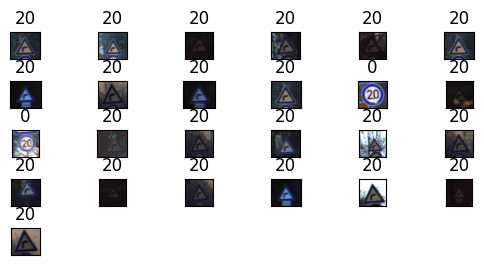

In [52]:
rand_num = np.random.randint(1, 400, size=25)

print(rand_num)
for num in range(len(rand_num)):
    plt.subplot(8, 6, num + 1)
    # print(training_images_path[rand_num[num]])
    img = cv2.imread(training_images_path[rand_num[num]])
    plt.imshow(img)
    plt.title(training_labels[rand_num[num]])
    plt.subplots_adjust(wspace=0.4, hspace=0.8)
    plt.xticks([])
    plt.yticks([])

## Since the pictures were too small and it was also in large quantity hence we havnt used data augmentation


In [37]:
training_data = []
# print(training_images_path)
for num in range(len(train_df)):
    img = cv2.imread(train_df["Path"][num])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img.astype("uint8"))

    img = img / 255.00
    img = cv2.resize(img, (33, 33), interpolation=cv2.INTER_NEAREST)
    # img = img.reshape(33,33,1)
    training_data.append(img)

training_data = np.array(training_data)

In [26]:
testing_data = []
# print(training_images_path)
for num in range(len(test_df)):
    # print(num)
    img = cv2.imread(test_df["Path"][num])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img.astype("uint8"))

    img = img / 255.00
    img = cv2.resize(img, (33, 33), interpolation=cv2.INTER_NEAREST)
    #     img = img.reshape(33,33,1)
    testing_data.append(img)

testing_data = np.array(testing_data)

In [38]:
training_data = training_data.reshape(
    training_data.shape[0], training_data.shape[1], training_data.shape[2], 1
)

In [39]:
testing_data = testing_data.reshape(
    testing_data.shape[0], testing_data.shape[1], testing_data.shape[2], 1
)

DATA AUGMENTATION


In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    rotation_range=10,
    horizontal_flip=False,
)

In [42]:
datagen.fit(training_data)

In [43]:
y_train = to_categorical(train_df.Labels)  # Changing into categorical variable
y_test = to_categorical(test_df.Labels)  # changing into categorical variable

In [44]:
batch = datagen.flow(training_data, y_train, batch_size=20)

In [45]:
train_batch, train_label_batch = next(batch)

34


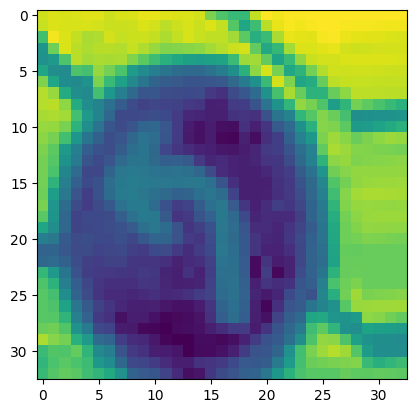

In [46]:
plt.imshow(train_batch[6].reshape(33, 33))
print(np.argmax(train_label_batch[6]))

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping callback to stop training if the validation accuracy doesn't improve
stop = EarlyStopping(monitor="val_accuracy", patience=4, restore_best_weights=True)

# Initialize the model
model = Sequential()

# First convolutional layer with max pooling and dropout
model.add(
    Conv2D(filters=32, kernel_size=(5, 5), activation="relu", input_shape=(33, 33, 1))
)
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))  # MaxPooling layer
model.add(Dropout(rate=0.25))  # Dropout layer for regularization

# Second convolutional layer with max pooling and dropout
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))  # MaxPooling layer
model.add(Dropout(rate=0.25))  # Dropout layer for regularization

# Flatten the output for the fully connected layer
model.add(Flatten())

# Fully connected layer with 256 units and ReLU activation
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))  # Dropout for regularization

# Output layer with softmax for classification (43 classes for traffic signs)
model.add(Dense(43, activation="softmax"))

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

c:\Users\tamil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    datagen.flow(
        training_data, y_train, batch_size=32
    ),  # Generator for data augmentation
    validation_data=(testing_data, y_test),  # Validation data
    epochs=15,  # Number of epochs
    verbose=1,  # Progress display
    callbacks=[stop],  # Early stopping or other callbacks
)

c:\Users\tamil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 49s 38ms/step - accuracy: 0.2564 - loss: 2.7087 - val_accuracy: 0.8575 - val_loss: 0.4894
Epoch 2/15
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 45s 37ms/step - accuracy: 0.7023 - loss: 0.9550 - val_accuracy: 0.9290 - val_loss: 0.2525
Epoch 3/15
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 46s 38ms/step - accuracy: 0.8007 - loss: 0.6340 - val_accuracy: 0.9436 - val_loss: 0.1998
Epoch 4/15
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 46s 38ms/step - accuracy: 0.8383 - loss: 0.5036 - val_accuracy: 0.9505 - val_loss: 0.1624
Epoch 5/15
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 45s 37ms/step - accuracy: 0.8636 - loss: 0.4375 - val_accuracy: 0.9617 - val_loss: 0.1350
Epoch 6/15
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 45s 37ms/step - accuracy: 0.8848 - loss: 0.3767 - val_accuracy: 0.9616 - val_loss: 0.1258
Epoch 7/15
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - accuracy: 0.8952 - loss: 0.3318 - val_accuracy: 0.9643 - val_loss: 0.1270
Epoch 8/15
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - accuracy: 0.9052 -

In [71]:
pred = model.predict(testing_data)

395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step


In [ ]:
result = np.argmax(pred, axis=1)

print(result)

[35 39  1 ... 15 38 17]


In [83]:
len(result)

12630

In [84]:
from sklearn.metrics import accuracy_score

accuracy_score(test_df.Labels, result)

0.9759303246239113

In [85]:
model.save("model_traffic_data1.keras")

## Plotting the result and graphs


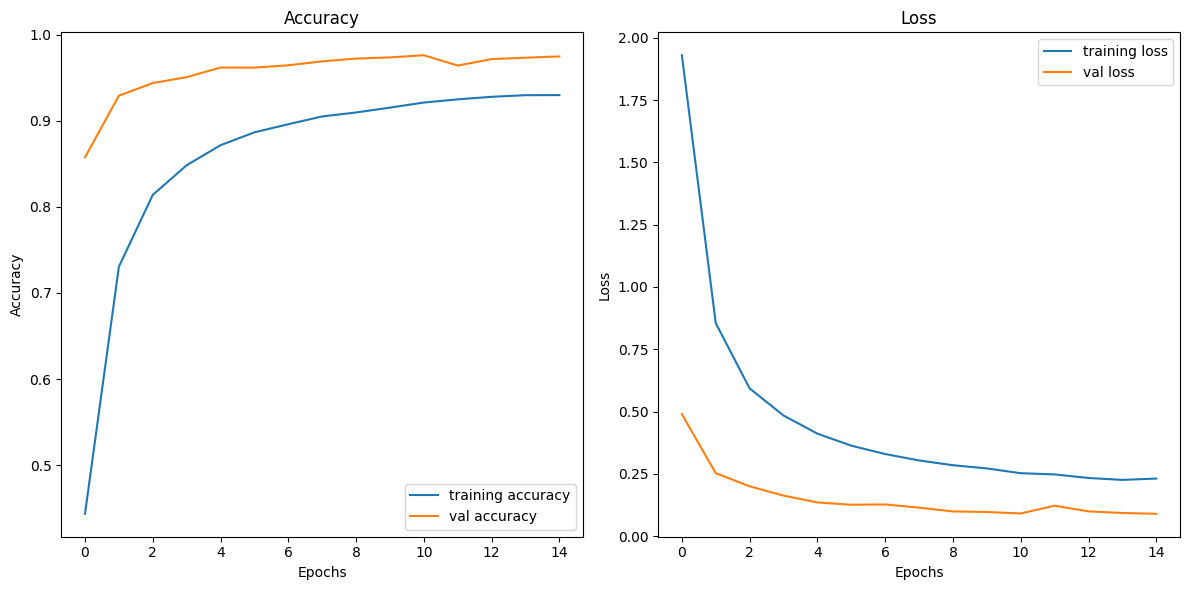

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting Accuracy on the first subplot (axes[0])
axes[0].plot(history.history["accuracy"], label="training accuracy")
axes[0].plot(history.history["val_accuracy"], label="val accuracy")
axes[0].set_title("Accuracy")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Accuracy")
axes[0].legend()

# Plotting Loss on the second subplot (axes[1])
axes[1].plot(history.history["loss"], label="training loss")
axes[1].plot(history.history["val_loss"], label="val loss")
axes[1].set_title("Loss")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss")
axes[1].legend()

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Predicted Class ID: 8
Predicted Class: Speed limit (120km/h)


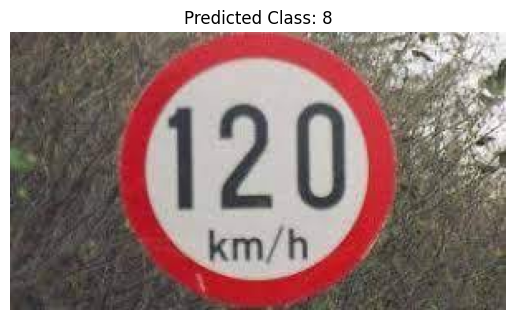

In [102]:
# Convert to grayscale (if your model expects grayscale images)
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import warnings

warnings.filterwarnings("ignore")

# Define class labels
classes = {
    0: "Speed limit (20km/h)",
    1: "Speed limit (30km/h)",
    2: "Speed limit (50km/h)",
    3: "Speed limit (60km/h)",
    4: "Speed limit (70km/h)",
    5: "Speed limit (80km/h)",
    6: "End of Speed limit (80km/h)",
    7: "Speed limit (100km/h)",
    8: "Speed limit (120km/h)",
    9: "No passing",
    10: "No passing veh over 3.5 tons",
    11: "Right-of-way at intersection",
    12: "Priority road",
    13: "Yield",
    14: "Stop",
    15: "No vehicles",
    16: "Veh > 3.5 tons prohibited",
    17: "No entry",
    18: "General caution",
    19: "Dangerous curve left",
    20: "Dangerous curve right",
    21: "Double curve",
    22: "Bumpy road",
    23: "Slippery road",
    24: "Road narrows on the right",
    25: "Road work",
    26: "Traffic signals",
    27: "Pedestrians",
    28: "Children crossing",
    29: "Bicycle crossing",
    30: "Beware of ice/snow",
    31: "Wild animals crossing",
    32: "End speed + passing limits",
    33: "Turn right ahead",
    34: "Turn left ahead",
    35: "Ahead only",
    36: "Go straight or right",
    37: "Go straight or left",
    38: "Keep right",
    39: "Keep Left",
    40: "Roundabout mandatory",
    41: "End of no passing",
    42: "End of no passing veh > 3.5 tons",
}

# Load the saved model
model = load_model("model_traffic_data1.keras")

# Path to the image
my_path = r"E:\AIE_Expert_Internship\traffic_sign_detection\traffic_120Km.jpeg"

# Load and preprocess the image
img = cv2.imread(my_path)
if img is None:
    print(f"Error loading image at {my_path}")
else:
    # Resize the image to the input size expected by the model (30x30 or 33x33, as per your model)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (33, 33))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Resize to match the input size
    img = cv2.resize(img, (33, 33))

    # Normalize the image
    img = img / 255.0

    # Add the extra dimension for the channels (now it becomes (33, 33, 1))
    img = np.expand_dims(img, axis=-1)

    # Add batch dimension (shape becomes (1, 33, 33, 1))
    img = np.expand_dims(img, axis=0)

    # Make the prediction
    pred = model.predict(img)

    # Get the class with the highest probability
    predicted_class = np.argmax(pred, axis=1)

    # Display the image and the prediction
    plt.imshow(cv2.cvtColor(cv2.imread(my_path), cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted Class: {predicted_class[0]}")
    plt.axis("off")
    plt.show
    print(f"Predicted Class ID: {predicted_class[0]}")
    print(f"Predicted Class: {classes[predicted_class[0]]}")